# Setup

In [2]:
!pip install scikit-plot

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import clone

import scikitplot as skplt

# Load the Dataset

https://www.openml.org/search?type=data&sort=runs&id=43618&status=active

https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [4]:
%%time
dataset = pd.read_csv('/kaggle/input/apartments-for-rent-classified/apartments_for_rent_classified_10K.csv', sep=';', engine='python')

CPU times: user 300 ms, sys: 30.9 ms, total: 331 ms
Wall time: 354 ms


In [5]:
dataset

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [47]:
# drop columns not useful
X = pd.DataFrame(dataset.drop(columns=['id', 'category', 'title', 'body', 'address']))

# EDA

In [48]:
X

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,4.0,5.0,USD,No,Thumbnail,NaN,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,NaN,8.0,6.0,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,NaN,8.5,6.0,USD,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      6451 non-null   object 
 1   bathrooms      9966 non-null   float64
 2   bedrooms       9993 non-null   float64
 3   currency       10000 non-null  object 
 4   fee            10000 non-null  object 
 5   has_photo      10000 non-null  object 
 6   pets_allowed   5837 non-null   object 
 7   price          10000 non-null  int64  
 8   price_display  10000 non-null  object 
 9   price_type     10000 non-null  object 
 10  square_feet    10000 non-null  int64  
 11  cityname       9923 non-null   object 
 12  state          9923 non-null   object 
 13  latitude       9990 non-null   float64
 14  longitude      9990 non-null   float64
 15  source         10000 non-null  object 
 16  time           10000 non-null  int64  
dtypes: float64(4), int64(3), object(10)
memory usage: 1

# Cleaning the Dataset

In [50]:
X.loc[:, 'amenities'] = np.where(dataset['amenities'].isna(), 0, 1)
X

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,USD,No,Thumbnail,NaN,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,USD,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,NaN,1.0,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [51]:
X.loc[:, 'bathrooms'] = dataset['bathrooms'].fillna(0)
X

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,USD,No,Thumbnail,NaN,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,USD,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [52]:
dataset['currency'].unique()

array(['USD'], dtype=object)

In [53]:
X = X.drop(columns=['currency'])
X

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,No,Thumbnail,NaN,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,No,Thumbnail,NaN,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,No,Thumbnail,NaN,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,No,Thumbnail,NaN,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,No,Thumbnail,NaN,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [54]:
dataset['fee'].unique()

array(['No'], dtype=object)

In [55]:
X = X.drop(columns=['fee'])
X

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,Thumbnail,NaN,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,Thumbnail,NaN,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,Thumbnail,NaN,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,Thumbnail,NaN,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,Thumbnail,NaN,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,Thumbnail,NaN,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,Thumbnail,NaN,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,Thumbnail,NaN,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,Thumbnail,NaN,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [56]:
dataset['has_photo'].unique()

array(['Thumbnail', 'Yes', 'No'], dtype=object)

In [57]:
has_photo_array, has_photo_uniques = pd.factorize(dataset['has_photo'])
X.loc[:, 'has_photo'] = has_photo_array
X

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,0,NaN,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,0,NaN,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,0,NaN,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,0,NaN,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,0,NaN,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,0,NaN,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,0,NaN,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,0,NaN,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,0,NaN,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [58]:
dataset['pets_allowed'].unique()

array([nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [59]:
pets_allowed_array, pets_allowed_uniques = pd.factorize(dataset['pets_allowed'])
X.loc[:, 'pets_allowed'] = pets_allowed_array
X

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,0,-1,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,0,-1,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,0,-1,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,0,-1,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,0,-1,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,0,-1,6000,"$6,000",Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,0,-1,25000,"$25,000",Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,0,-1,11000,"$11,000",Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,0,-1,4790,"$4,790",Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [60]:
X = X.drop(columns=['price_display'])
X

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,0,-1,790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,0,-1,425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,0,-1,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,0,-1,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,0,-1,880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,0,-1,6000,Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,0,-1,25000,Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,0,-1,11000,Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,0,-1,4790,Monthly,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [61]:
dataset['price_type'].unique()

array(['Monthly', 'Weekly', 'Monthly|Weekly'], dtype=object)

In [62]:
price_type_array, price_type_uniques = pd.factorize(dataset['price_type'])
X.loc[:, 'price_type'] = price_type_array
X

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,0,-1,790,0,101,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,0,0.0,1.0,0,-1,425,0,106,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,0,1.0,0.0,0,-1,1390,0,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,0,1.0,0.0,0,-1,925,0,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,0,0.0,0.0,0,-1,880,0,125,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,0,-1,6000,0,6300,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,0,8.0,6.0,0,-1,25000,0,8716,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,0,8.5,6.0,0,-1,11000,0,11318,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,1,0.0,1.0,0,-1,4790,0,40000,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [63]:
cityname_array, cityname_uniques = pd.factorize(dataset['cityname'])
state_array, state_uniques = pd.factorize(dataset['state'])
source_array, source_uniques = pd.factorize(dataset['source'])
X.loc[:, 'cityname'] = cityname_array
X.loc[:, 'state'] = state_array
X.loc[:, 'source'] = source_array
X

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,0,0.0,0.0,0,-1,790,0,101,0,0,38.9057,-76.9861,0,1577359415
1,0,0.0,1.0,0,-1,425,0,106,1,1,37.9680,-87.6621,0,1577017063
2,0,1.0,0.0,0,-1,1390,0,107,2,2,38.8910,-77.0816,0,1577359410
3,0,1.0,0.0,0,-1,925,0,116,3,3,47.6160,-122.3275,0,1576667743
4,0,0.0,0.0,0,-1,880,0,125,2,2,38.8738,-77.1055,0,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4.0,5.0,0,-1,6000,0,6300,628,25,44.9000,-93.3233,0,1575112975
9996,0,8.0,6.0,0,-1,25000,0,8716,1533,5,34.4331,-119.6331,0,1577360419
9997,0,8.5,6.0,0,-1,11000,0,11318,80,12,39.0287,-77.2409,0,1577360560
9998,1,0.0,1.0,0,-1,4790,0,40000,751,4,40.7716,-73.9876,1,1577362186


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     10000 non-null  object 
 1   bathrooms     10000 non-null  float64
 2   bedrooms      9993 non-null   float64
 3   has_photo     10000 non-null  object 
 4   pets_allowed  10000 non-null  object 
 5   price         10000 non-null  int64  
 6   price_type    10000 non-null  object 
 7   square_feet   10000 non-null  int64  
 8   cityname      10000 non-null  object 
 9   state         10000 non-null  object 
 10  latitude      9990 non-null   float64
 11  longitude     9990 non-null   float64
 12  source        10000 non-null  object 
 13  time          10000 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [65]:
X.loc[:, 'bedrooms'] = dataset['bedrooms'].fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     10000 non-null  object 
 1   bathrooms     10000 non-null  float64
 2   bedrooms      10000 non-null  float64
 3   has_photo     10000 non-null  object 
 4   pets_allowed  10000 non-null  object 
 5   price         10000 non-null  int64  
 6   price_type    10000 non-null  object 
 7   square_feet   10000 non-null  int64  
 8   cityname      10000 non-null  object 
 9   state         10000 non-null  object 
 10  latitude      9990 non-null   float64
 11  longitude     9990 non-null   float64
 12  source        10000 non-null  object 
 13  time          10000 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [67]:
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     9990 non-null   object 
 1   bathrooms     9990 non-null   float64
 2   bedrooms      9990 non-null   float64
 3   has_photo     9990 non-null   object 
 4   pets_allowed  9990 non-null   object 
 5   price         9990 non-null   int64  
 6   price_type    9990 non-null   object 
 7   square_feet   9990 non-null   int64  
 8   cityname      9990 non-null   object 
 9   state         9990 non-null   object 
 10  latitude      9990 non-null   float64
 11  longitude     9990 non-null   float64
 12  source        9990 non-null   object 
 13  time          9990 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [68]:
n_features = X.shape[1]
n_features

14

# Preprocessing the Dataset

## Standardize

In [69]:
X = StandardScaler().fit_transform(X)

In [70]:
X

array([[-1.34923698, -2.22065574, -1.8480616 , ...,  1.12101843,
        -0.65337187,  0.65649288],
       [-1.34923698, -2.22065574, -0.78799411, ...,  0.44356496,
        -0.65337187,  0.56552267],
       [-1.34923698, -0.60689631, -1.8480616 , ...,  1.11495841,
        -0.65337187,  0.65649155],
       ...,
       [-1.34923698, 11.4962994 ,  4.51234334, ...,  1.10484991,
        -0.65337187,  0.65679713],
       [ 0.74115964, -2.22065574, -0.78799411, ...,  1.31129046,
         0.04923146,  0.65722919],
       [ 0.74115964, -0.60689631, -0.78799411, ...,  0.67573047,
         1.45443813,  0.65721724]])

## Dimension Reduction Using PCA

In [71]:
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

<Axes: title={'center': 'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

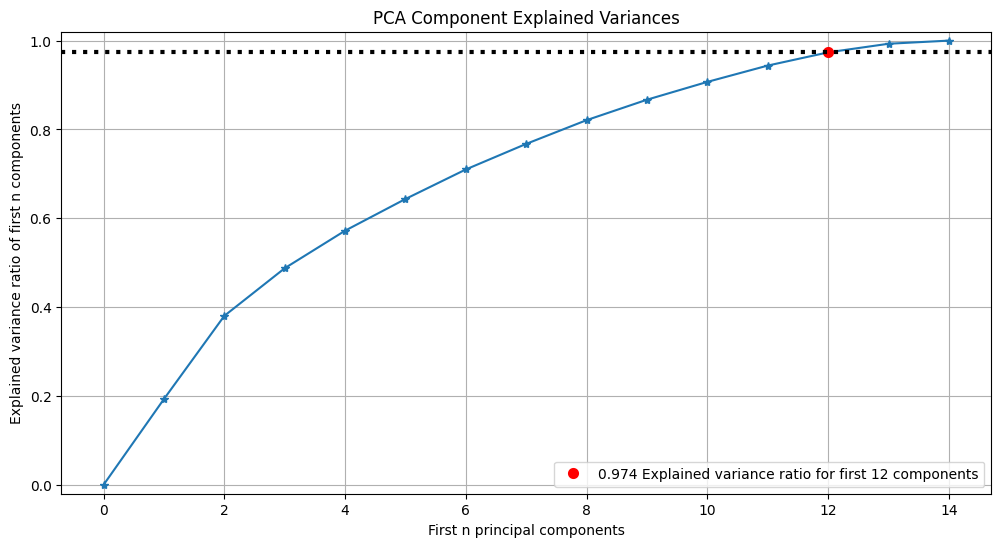

In [72]:
skplt.decomposition.plot_pca_component_variance(pca, target_explained_variance=0.95, figsize=(12, 6))

In [73]:
y = np.cumsum(pca.explained_variance_ratio_)
n_components_pca = np.where(y >= 0.95)[0][0]+1
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 12


In [74]:
pca_95 = PCA(n_components=n_components_pca, random_state=42)
_X = pca_95.fit_transform(X)

# Build and Traing Models

https://scikit-learn.org/stable/modules/clustering.html#clustering

## Train KMeans Models with Different Parameters

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [76]:
no_of_clusters = range(2, 21)

In [77]:
def train_model(base_model, no_of_clusters):
  silhouette_scores = []
  models = []
  for cluster in no_of_clusters:
    model = clone(base_model)
    model = model.set_params(**{'n_clusters': cluster})
    model = model.fit(_X)
    silhouette_avg = silhouette_score(_X, model.labels_)
    silhouette_scores.append(silhouette_avg)
    models.append(model)
  return silhouette_scores, models

In [78]:
silhouette_scores, kmeans_models = train_model(KMeans(random_state=42, n_init='auto'), no_of_clusters)

In [79]:
def plot_score(no_of_clusters, silhouette_scores):
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xticks(range(1, len(no_of_clusters)+1), no_of_clusters, fontsize=12, fontweight="bold")
  ax.plot(range(1, len(no_of_clusters)+1), silhouette_scores, marker="o")
  ax.tick_params(axis='y')

  plt.yticks(fontsize=12, fontweight="bold")
  plt.xlabel("# of Clusters", fontsize=16, fontweight="bold")
  plt.ylabel("Silhouette", fontsize=16, fontweight="bold")

  plt.title("Silhouette Scree Plot per Cluster", fontsize=20, fontweight="bold")
  ax.title.set_position([.5, 1.025])
  plt.grid(False)
  plt.tight_layout()
  plt.show()


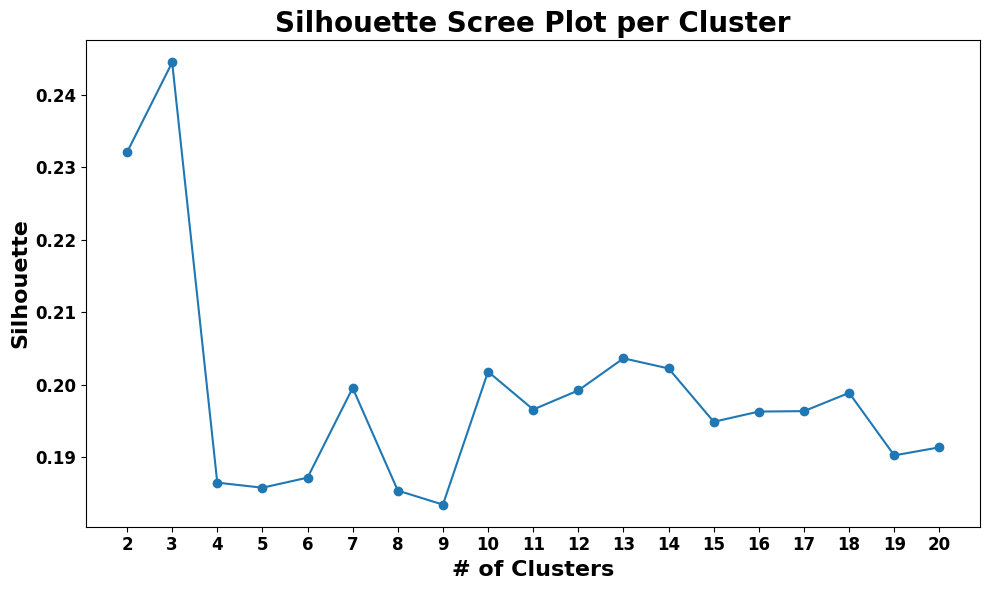

In [80]:
plot_score(no_of_clusters, silhouette_scores)

## Evaluate the Models

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [81]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_silhouette_analysis(models, silhouette_scores):
  for k in range(0, len(models)):
      clusterer = models[k]
      cluster_labels = clusterer.labels_
      n_clusters = len(np.unique(cluster_labels))

      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(_X) + (n_clusters + 1) * 10])


      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_scores[k]
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          _X[:, 0], _X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.23204664449671045
For n_clusters = 3 The average silhouette_score is : 0.2444412503025829
For n_clusters = 4 The average silhouette_score is : 0.18648717996489658
For n_clusters = 5 The average silhouette_score is : 0.1857873118621022
For n_clusters = 6 The average silhouette_score is : 0.18717605321631833
For n_clusters = 7 The average silhouette_score is : 0.1995494516305246
For n_clusters = 8 The average silhouette_score is : 0.1853931656193451
For n_clusters = 9 The average silhouette_score is : 0.18345649968099353
For n_clusters = 10 The average silhouette_score is : 0.20179686964946877
For n_clusters = 11 The average silhouette_score is : 0.1965718509231656


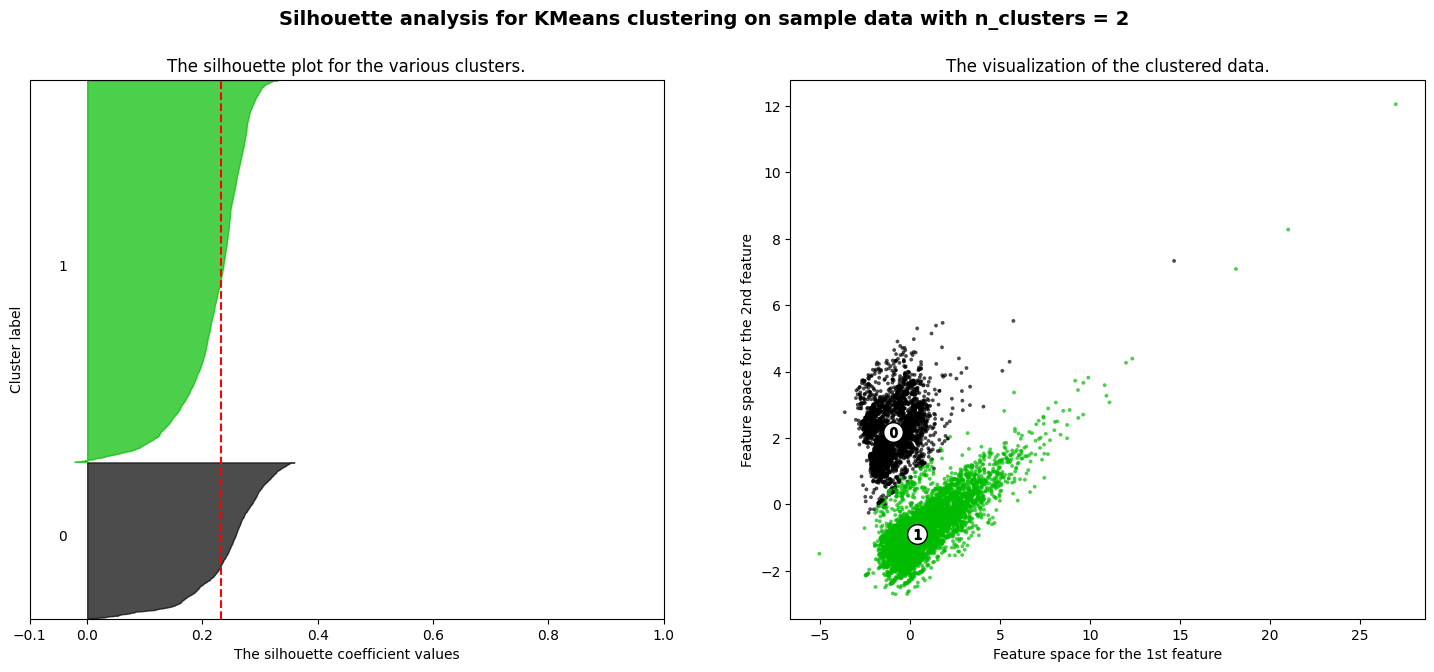

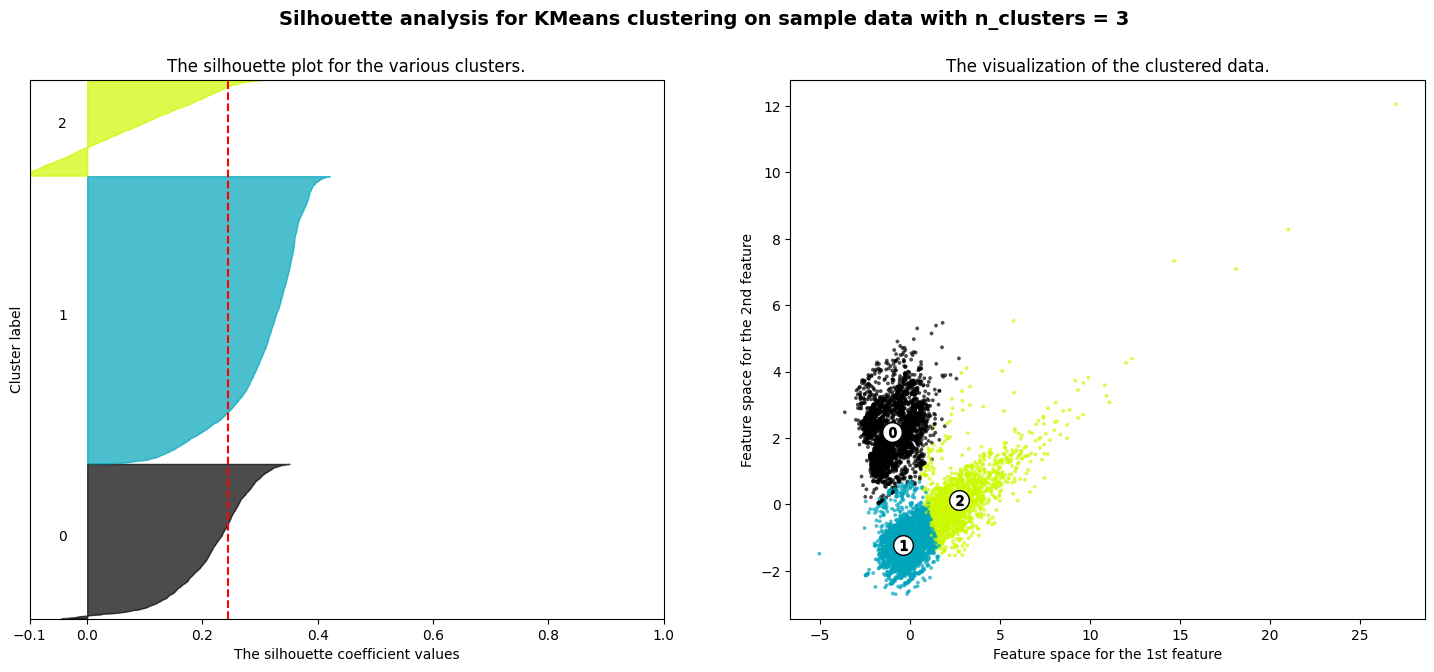

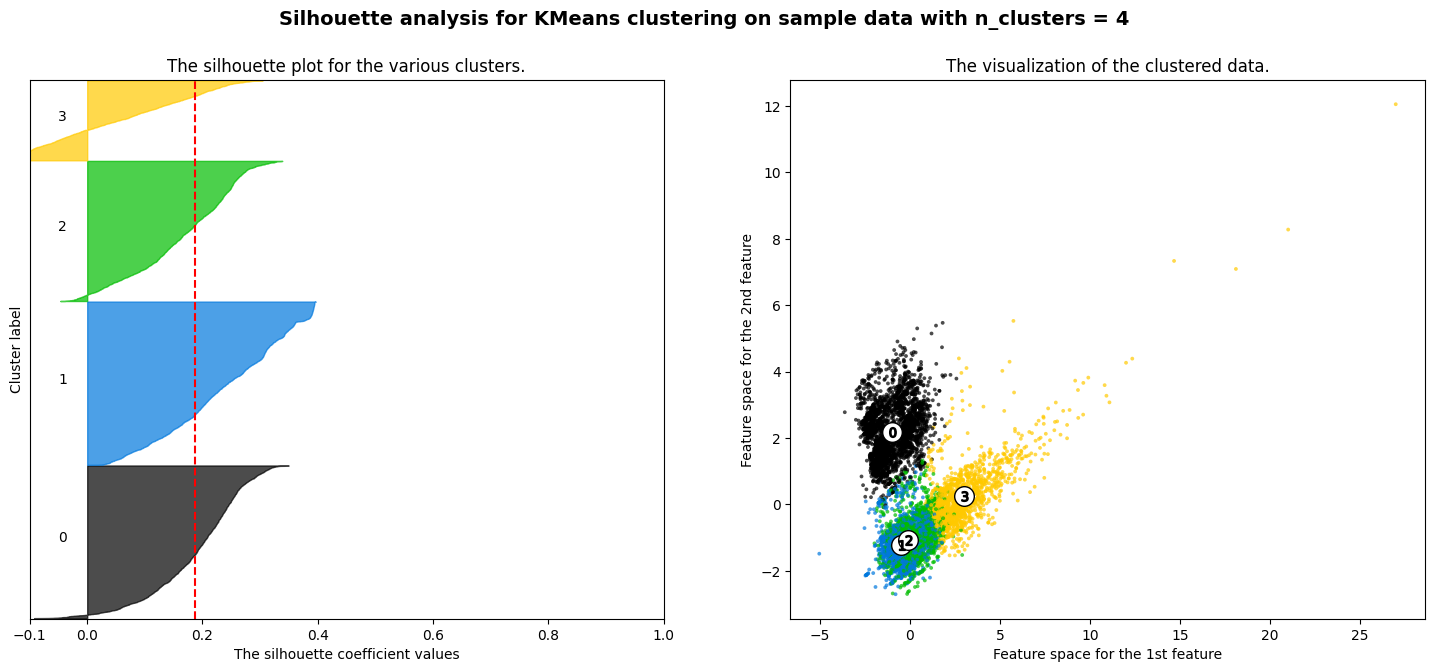

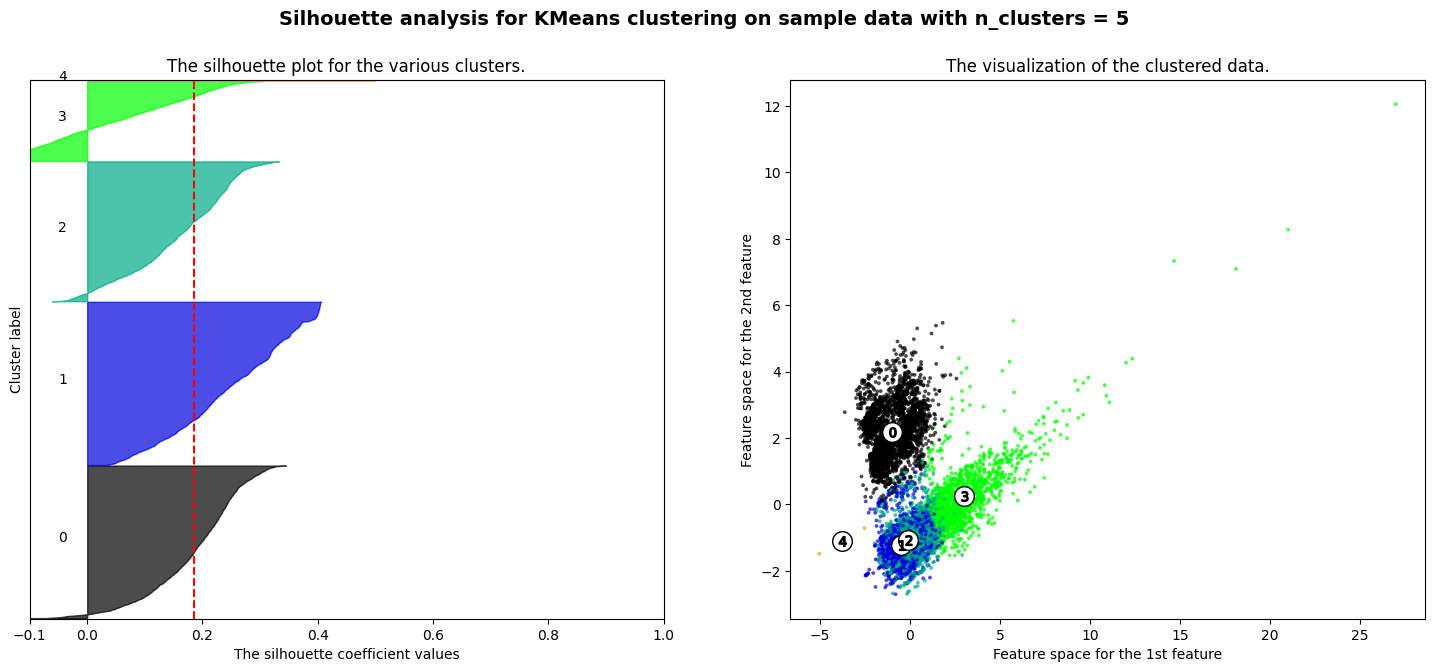

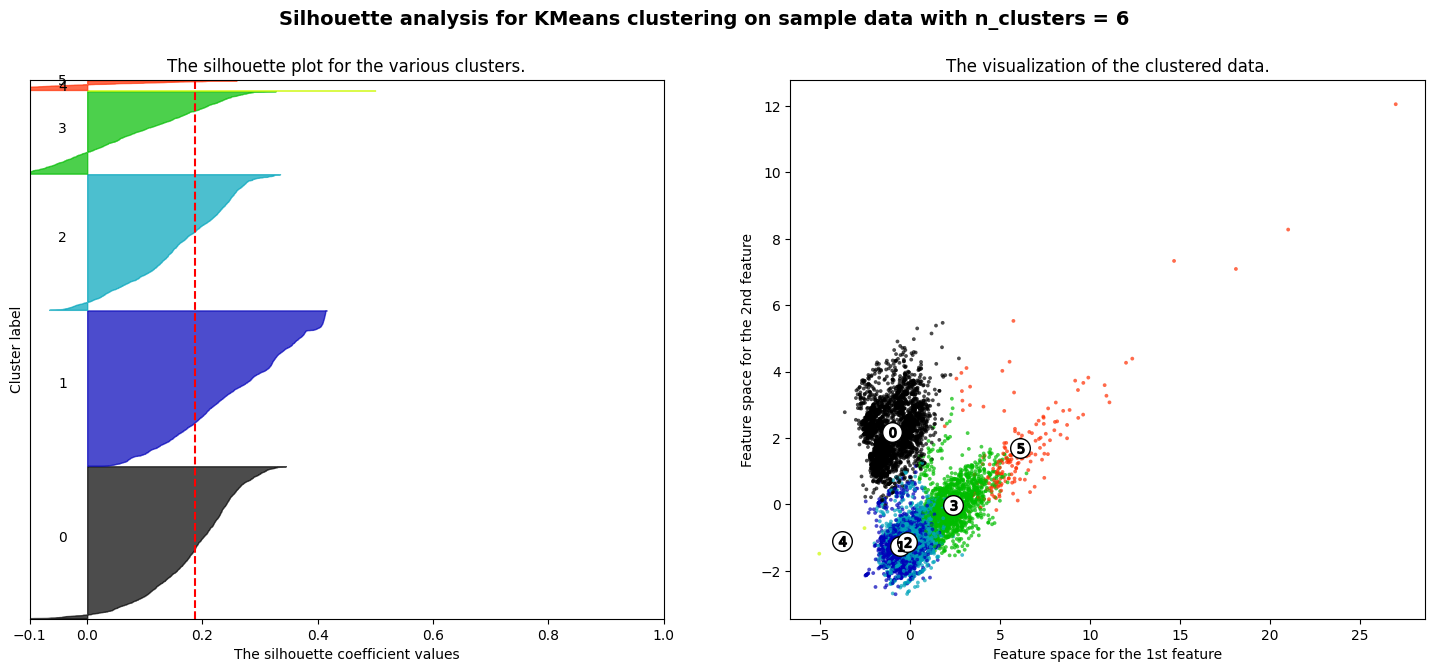

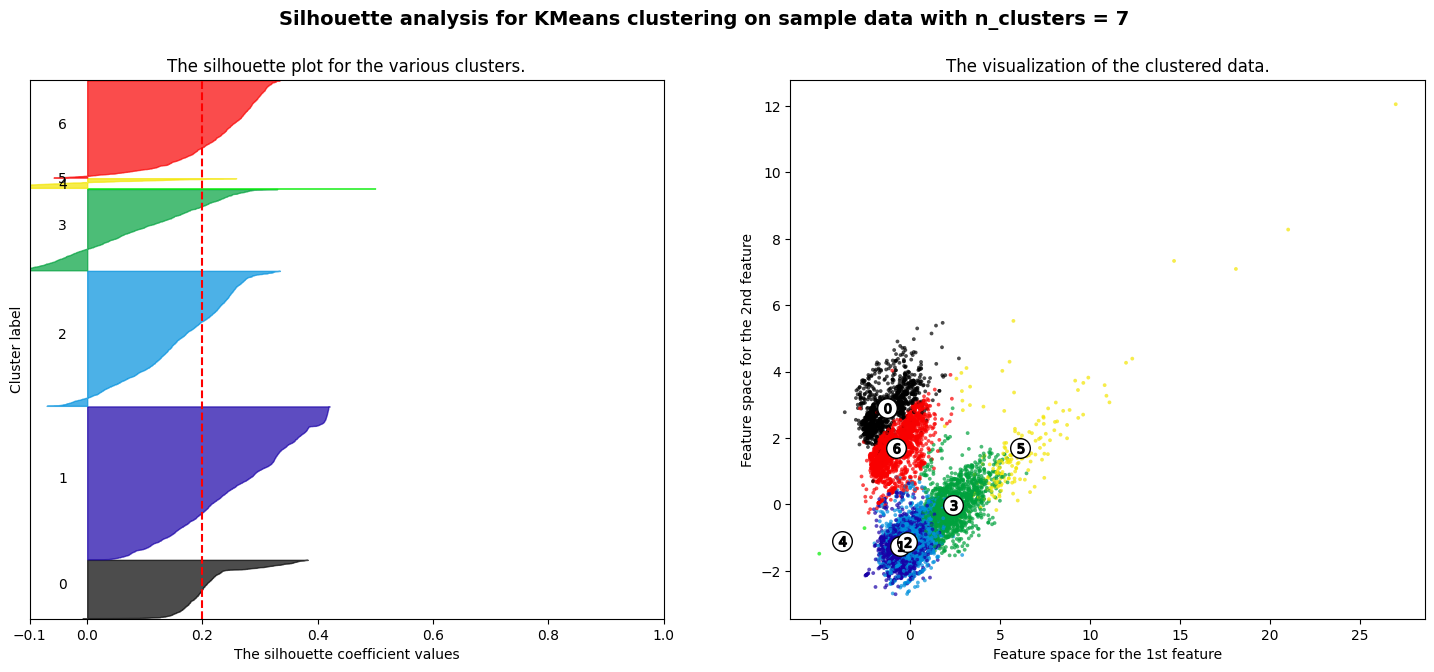

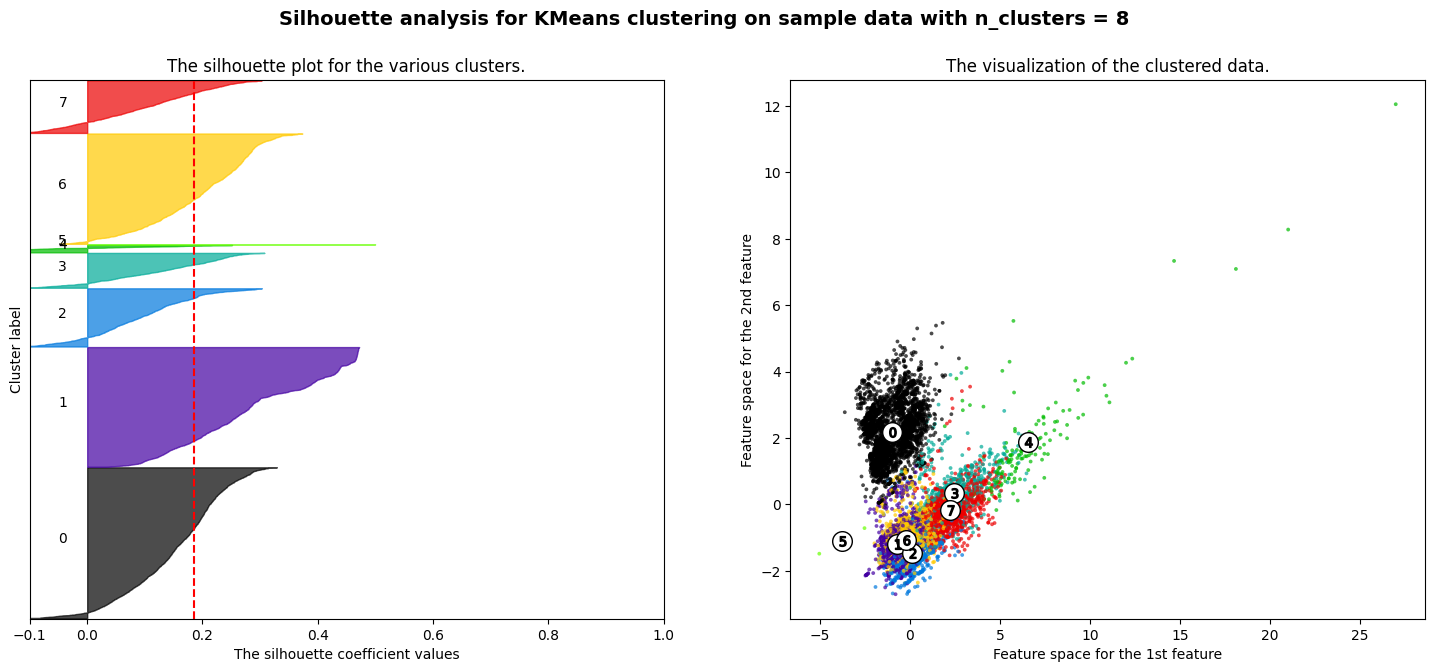

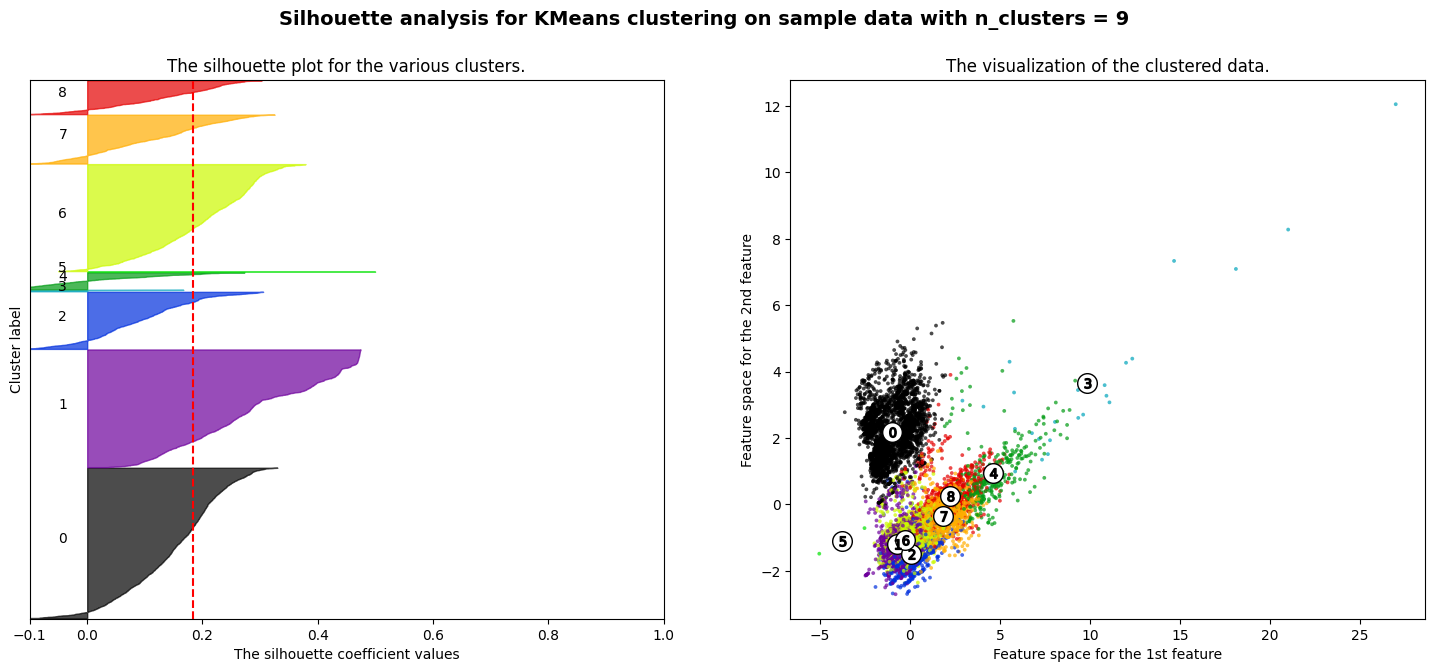

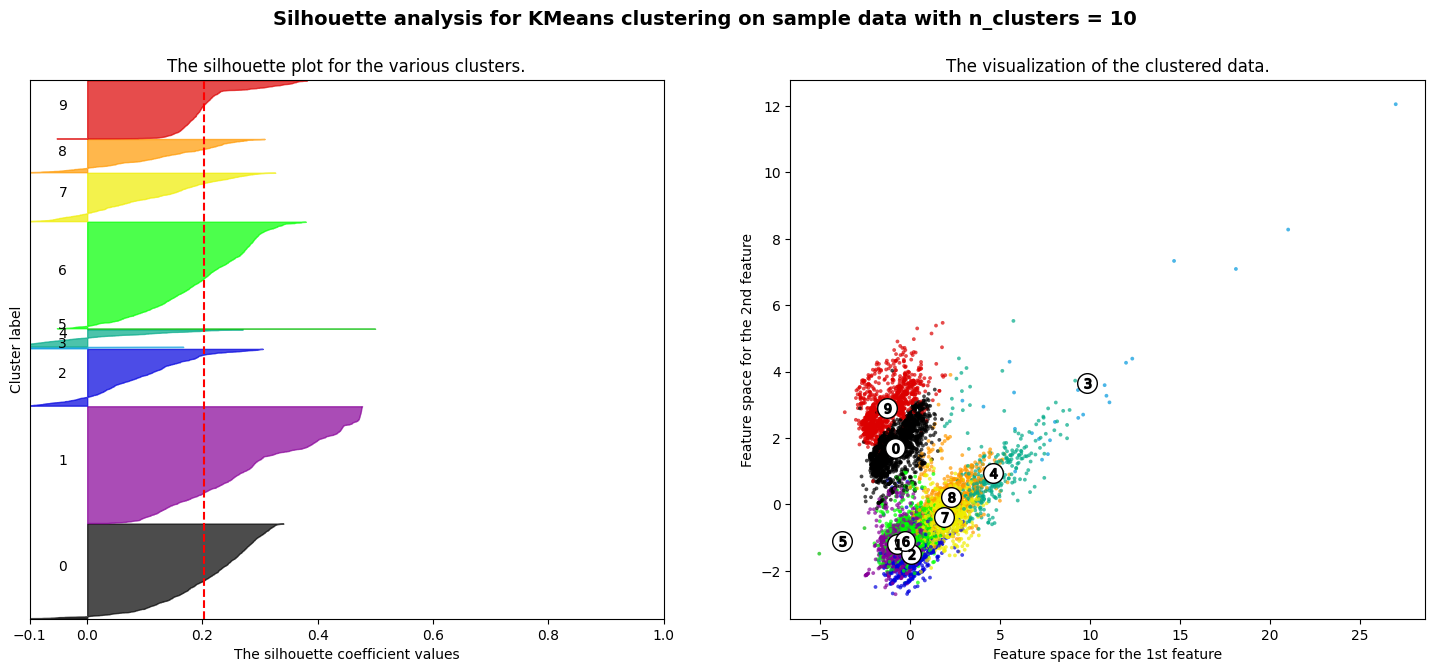

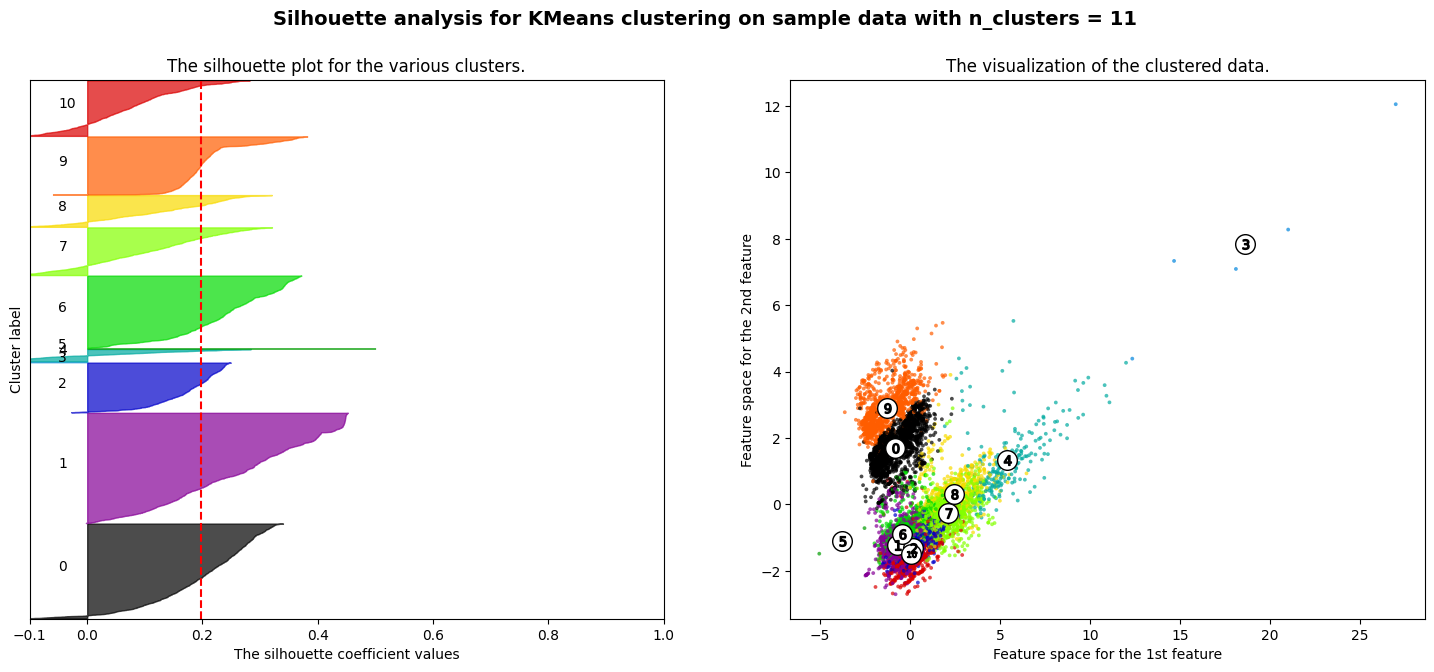

In [82]:
plot_silhouette_analysis(kmeans_models[:10], silhouette_scores)

## Try Other Algorithm - AgglomerativeClustering


In [83]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster

for n in range(2, 10):
  agglo = cluster.FeatureAgglomeration(n_clusters=n)
  agglo.fit(_X)
  X_reduced = agglo.transform(_X)

  agg = AgglomerativeClustering(n_clusters=n)
  agg.fit(X_reduced)
  print("For n_clusters =",
          n,
          "The average silhouette_score is :",
          silhouette_score(_X, agg.labels_),
  )

For n_clusters = 2 The average silhouette_score is : 0.2141048443473641
For n_clusters = 3 The average silhouette_score is : 0.22183543136831196
For n_clusters = 4 The average silhouette_score is : 0.15248584835522133
For n_clusters = 5 The average silhouette_score is : 0.15764007538024946
For n_clusters = 6 The average silhouette_score is : 0.1449409229696649
For n_clusters = 7 The average silhouette_score is : 0.1586878276813071
For n_clusters = 8 The average silhouette_score is : 0.14645217719110862
For n_clusters = 9 The average silhouette_score is : 0.16739261584353013


# Summary and Discussion




*  Based on the **Kmeans** algorithm, we try to build the model with different n_cluster values, and use **Silhouette Coefficient** as the basis for evaluating the model.
*  For a dense dataset, dividing too many clusters will result in some clusters having only a few data points, which may not make any sense in the real world. Using our data as an example, *n_cluster=3* gets the highest score. And from the analysis plot, it is also more meaningful.
*  Different algorithms may result in different results. For example, when we switch to **AgglomerativeClustering**, we get the highest score at *n_cluster=2* and this score is even higher than Kmeans at n_cluster=3.

